## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [1112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [1113]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [1114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [1115]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [1116]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2490.0        1
1481.0        1
1281.0        1
65.0          1
176.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [1117]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [1118]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [1119]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [1120]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [1121]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [1122]:
# Update null values to 0
df.fillna(0, inplace = True)

In [1123]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1124]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)

In [1125]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [1126]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [1127]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [1128]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [1129]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [1130]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [1131]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [1132]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [1133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [1134]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [1135]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [1136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [1137]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [1138]:
# cols to round
#cols = ['bedrooms', 'bathrooms']

#df[cols] = df[cols].round(0)
#df[cols]

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [1140]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

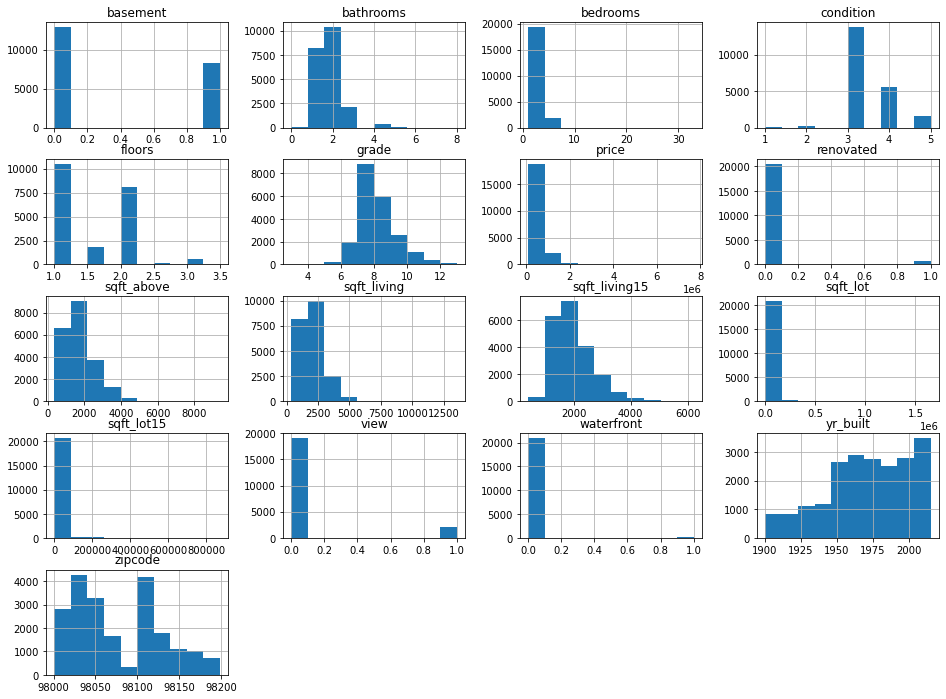

In [1141]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [1142]:
# bathrooms
#df['bathrooms'].hist();

In [1143]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [1144]:
#df['bathrooms'].value_counts()

In [1145]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [1146]:
# bathrooms
#df['bathrooms'].hist();

In [1147]:
# bedrooms
#df['bedrooms'].hist();

In [1148]:
#df['bedrooms'].value_counts()

In [1149]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [1150]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [1151]:
#df['bedrooms'].hist()

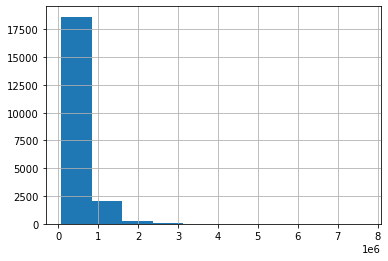

In [1152]:
#price
df.price.hist();

In [1153]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [1154]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [1155]:
# Set limit to 1100000
df = df[df['price']<=1600000]

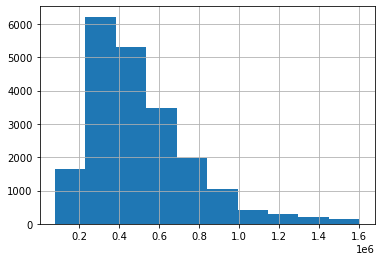

In [1156]:
df.price.hist();

In [1157]:
# features
sqft_feats = ['bathrooms', 'bedrooms','floors', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

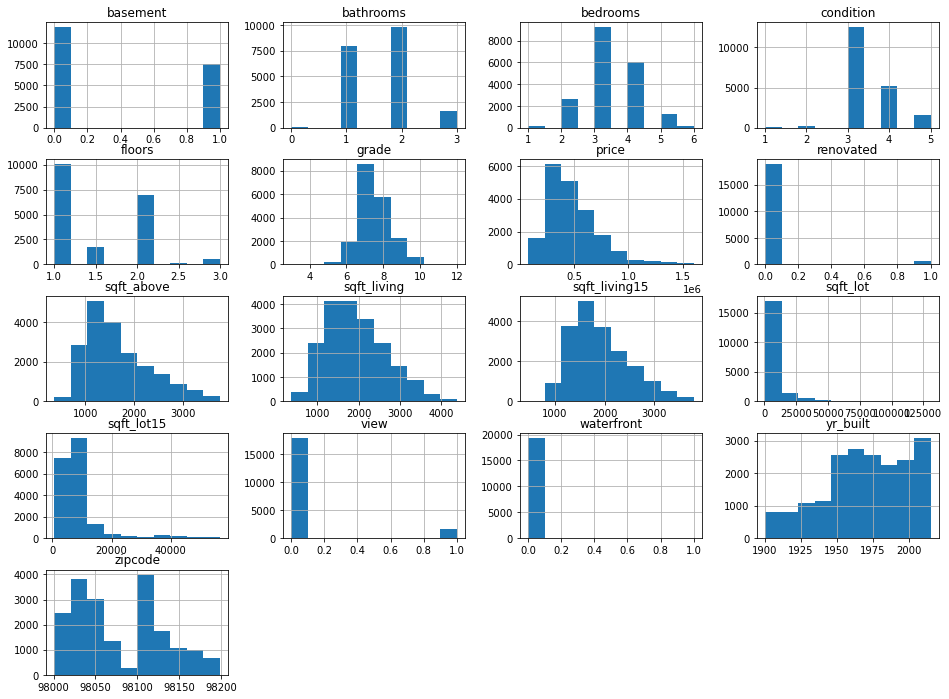

In [1158]:
df.hist(figsize=(16,12));

In [1159]:
df.floors.value_counts()

1.0    10032
2.0     6982
1.5     1744
3.0      558
2.5      111
Name: floors, dtype: int64

In [1160]:
df.bedrooms.value_counts()

3    9203
4    5998
2    2614
5    1245
6     184
1     183
Name: bedrooms, dtype: int64

In [1161]:
df.bathrooms.value_counts()

2    9762
1    7997
3    1598
0      70
Name: bathrooms, dtype: int64

## Normalize Continuous Features

In [1162]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = bathrooms (decided to not include bathrooms, bedrooms, floors)
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in log_feats:
    df[var]= np.log(df[var])

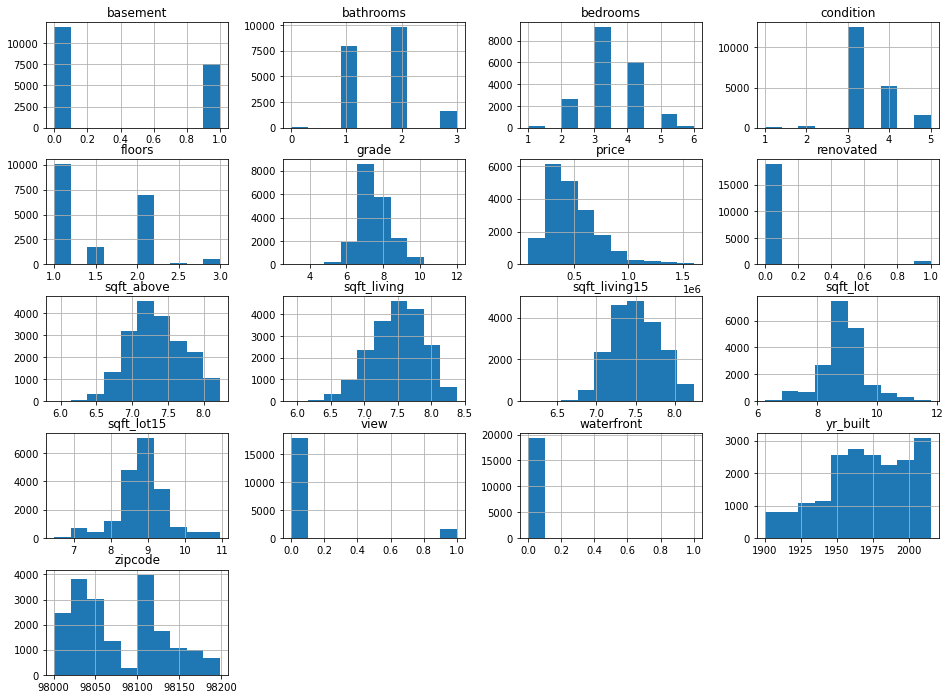

In [1163]:
df.hist(figsize = (16,12));

In [1164]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data more normal, it will just change the mean and the standard error!

continuous_feats = ['bathrooms', 'bedrooms', 'floors','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

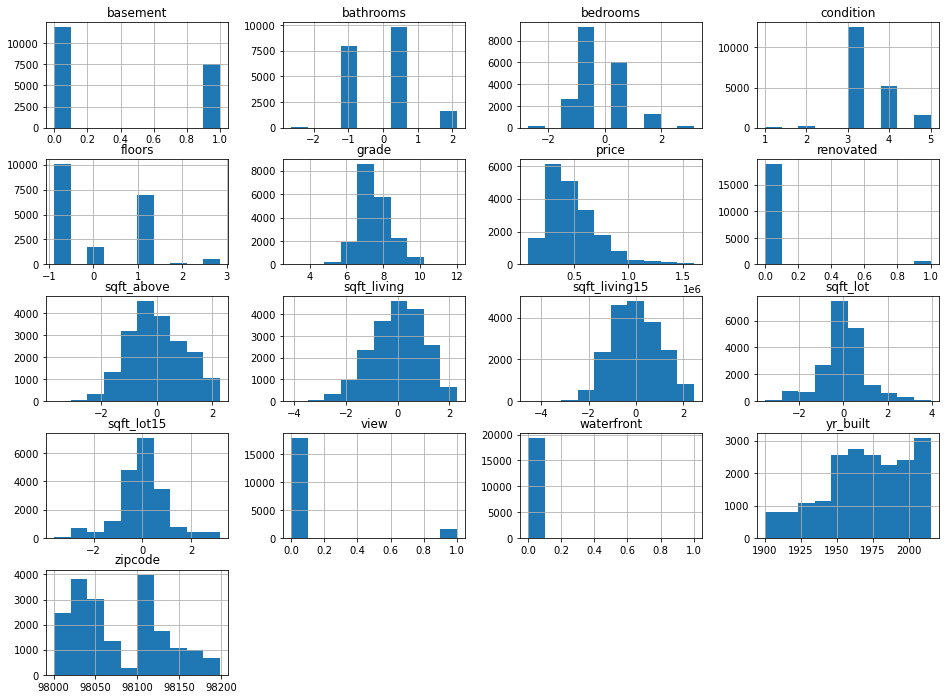

In [1165]:
df.hist(figsize = (16, 12));

In [1166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  int64  
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.7 MB


# Explore Data

## What are my top zip codes

In [1167]:
df.zipcode.value_counts()

98103    574
98115    558
98117    537
98052    537
98034    514
        ... 
98010     75
98070     66
98148     54
98024     40
98039     16
Name: zipcode, Length: 70, dtype: int64

In [1168]:
# Create copy
dfziptiers = df.copy()

In [1169]:
# Groupby zipcode and take median price
dfzipmed = dfziptiers.groupby(dfziptiers['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfzipmed = dfzipmed.reset_index()

# Set as string to match
dfzipmed['zipcode'] = dfzipmed['zipcode'].astype('object')

dfzipmed.head()

,zipcode,price
0,98039,1245000.0
1,98004,921000.0
2,98040,905000.0
3,98112,803975.0
4,98005,738950.0


In [1170]:
# Count number of houses in each zipcode

# Get list of unique zipcodes
zipcodelist = list(dfzipmed['zipcode'].unique())

# Create empty dictionary
zipcodecount = {}

# iterate through unique zipcodes and add count to dictionary
for zipcode in zipcodelist:
    count = len(dfziptiers[dfziptiers['zipcode'] == zipcode])
    zipcodecount[zipcode] = count
    
# create DataFrame based on count
dfzipcount = pd.DataFrame.from_dict(zipcodecount, orient='index')
dfzipcount = dfzipcount.reset_index()
dfzipcount = dfzipcount.rename(columns = {'index': 'zipcode', 0 :'count'})
dfzipcount.head()

,zipcode,count
0,98039,16
1,98004,214
2,98040,206
3,98112,210
4,98005,147


In [1171]:
# Merge the two tables
df_zip_price_count = dfzipmed.merge(dfzipcount, how = 'inner')
df_zip_price_count

,zipcode,price,count
0,98039,1245000.0,16
1,98004,921000.0,214
2,98040,905000.0,206
3,98112,803975.0,210
4,98005,738950.0,147
...,...,...,...
65,98188,262000.0,127
66,98001,260000.0,345
67,98032,249000.0,122
68,98168,235000.0,260


In [1172]:
# Define dictionary of tiers
tiers = {}
for i in range(0, len(dfzipmed), 7):
    tiers[f'zip_tier_{int((i/7)+1)}'] = list(dfzipmed['zipcode'])[i:i + 7]
print(tiers)

{'zip_tier_1': [98039, 98004, 98040, 98112, 98005, 98119, 98109], 'zip_tier_2': [98075, 98006, 98102, 98105, 98199, 98033, 98074], 'zip_tier_3': [98077, 98052, 98053, 98115, 98122, 98029, 98116], 'zip_tier_4': [98027, 98007, 98103, 98117, 98008, 98107, 98177], 'zip_tier_5': [98072, 98065, 98136, 98011, 98144, 98034, 98028], 'zip_tier_6': [98125, 98070, 98059, 98019, 98126, 98166, 98056], 'zip_tier_7': [98133, 98045, 98155, 98118, 98024, 98014, 98108], 'zip_tier_8': [98038, 98058, 98010, 98106, 98146, 98092, 98055], 'zip_tier_9': [98042, 98031, 98030, 98178, 98148, 98023, 98022], 'zip_tier_10': [98198, 98003, 98188, 98001, 98032, 98168, 98002]}


In [1173]:
# Create column with tiers
for key in tiers.keys():
    dfziptiers[key] = 0

# reset index before enumerate
dfziptiers = dfziptiers.reset_index(drop=True)

 # Change value to 1 if zipcode is in tier   
for index, zipcode in enumerate(dfziptiers['zipcode']):
    for key in tiers.keys():
        if zipcode in tiers[key]:
            dfziptiers.loc[index, key] = 1

In [1174]:
dfziptiers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_tier_1,zip_tier_2,zip_tier_3,zip_tier_4,zip_tier_5,zip_tier_6,zip_tier_7,zip_tier_8,zip_tier_9,zip_tier_10
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,3,7,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,3,6,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,5,7,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,3,8,...,0,1,0,0,0,0,0,0,0,0


In [1175]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  int64  
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
 17  zip_tier_1     19427 non-null  int64  
 18  zip_ti

## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

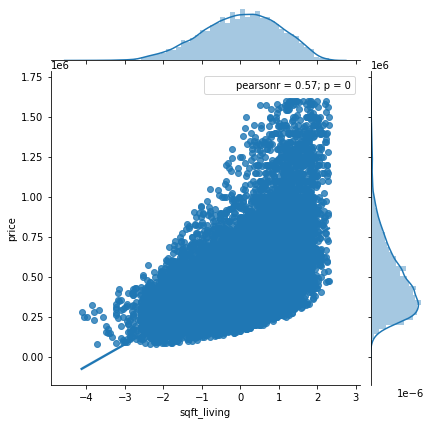

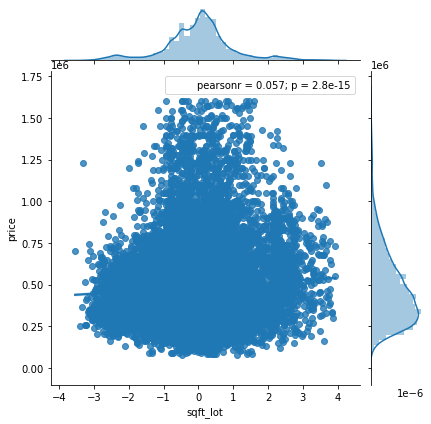

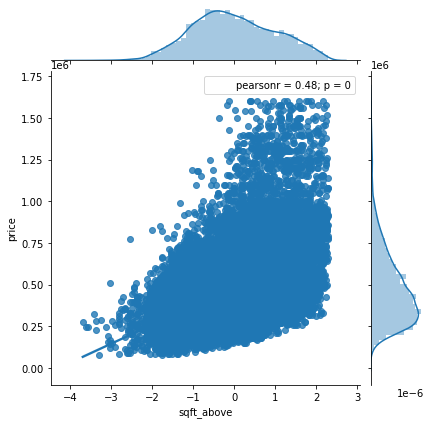

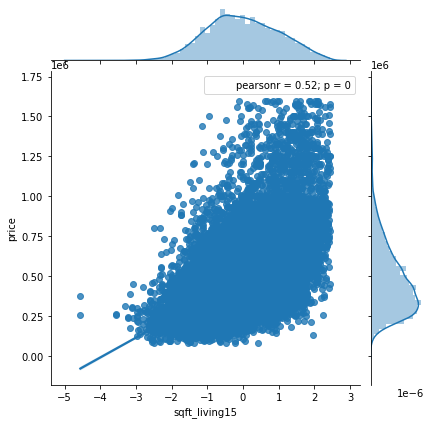

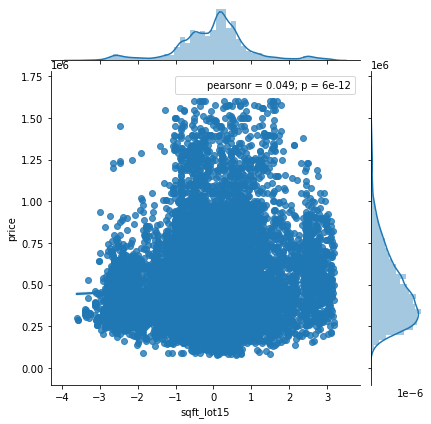

In [1176]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# Box Plots

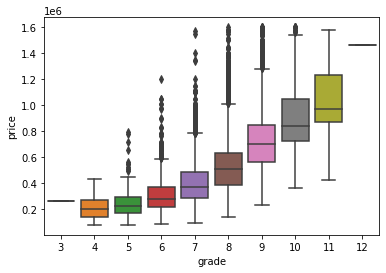

In [1177]:
sns.boxplot(x = df['grade'], y = df['price'])

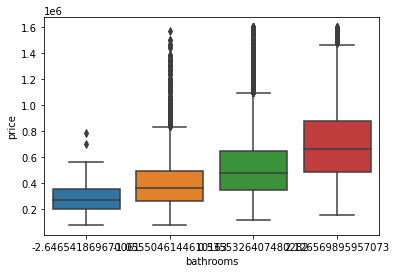

In [1178]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

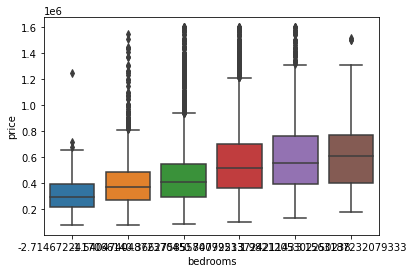

In [1179]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

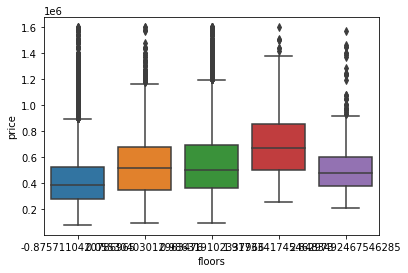

In [1180]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

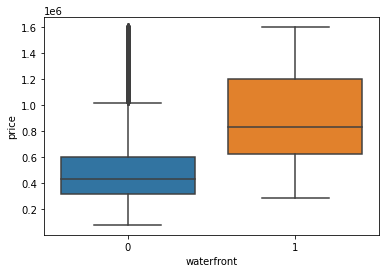

In [1181]:
sns.boxplot(x = df['waterfront'], y = df['price'])

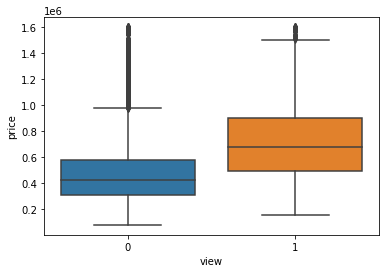

In [1182]:
sns.boxplot(x = df['view'], y = df['price'])

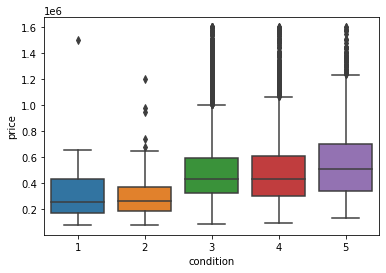

In [1183]:
sns.boxplot(x = df['condition'], y = df['price'])

## Check for multicollinearity

In [1184]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.285262,0.384606,0.574308,0.056632,0.245163,0.101507,0.293801,0.069338,0.618272,0.477246,0.002274,-0.000369,0.521103,0.049323,0.106959,0.203859
bedrooms,0.285262,1.000000,0.421296,0.633601,0.216917,0.150759,-0.029398,0.047124,0.036062,0.331484,0.511614,0.159728,-0.159980,0.402014,0.197016,0.001454,0.156934
bathrooms,0.384606,0.421296,1.000000,0.610781,-0.041031,0.479138,-0.005466,0.085310,-0.127381,0.529724,0.563744,0.461439,-0.152367,0.437238,-0.041909,0.040608,0.116076
sqft_living,0.574308,0.633601,0.610781,1.000000,0.270025,0.332451,0.012403,0.174816,-0.033872,0.686079,0.834579,0.337187,-0.205518,0.714724,0.250079,0.033666,0.246836
sqft_lot,0.056632,0.216917,-0.041031,0.270025,1.000000,-0.351419,0.058732,0.075511,0.119150,0.077591,0.246957,-0.080052,-0.261743,0.332476,0.909966,0.013745,-0.043190
floors,0.245163,0.150759,0.479138,0.332451,-0.351419,1.000000,-0.000217,-0.021464,-0.267322,0.451490,0.537031,0.497274,-0.056333,0.242488,-0.337343,-0.002810,-0.274838
waterfront,0.101507,-0.029398,-0.005466,0.012403,0.058732,-0.000217,1.000000,0.193305,0.005121,0.007636,0.000335,-0.033008,0.045827,0.032289,0.069180,0.067045,0.017463
view,0.293801,0.047124,0.085310,0.174816,0.075511,-0.021464,0.193305,1.000000,0.044514,0.160235,0.075261,-0.087682,0.121649,0.212609,0.072919,0.067537,0.179069
condition,0.069338,0.036062,-0.127381,-0.033872,0.119150,-0.267322,0.005121,0.044514,1.000000,-0.149152,-0.144121,-0.353514,-0.009393,-0.083396,0.124530,-0.056623,0.130997
grade,0.618272,0.331484,0.529724,0.686079,0.077591,0.451490,0.007636,0.160235,-0.149152,1.000000,0.688606,0.459912,-0.167613,0.636273,0.091115,0.003602,0.040287


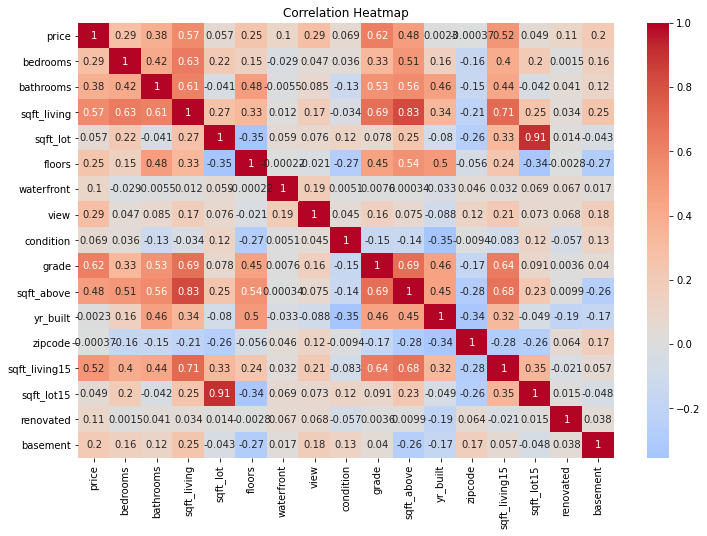

In [1185]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [1186]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.285262,0.384606,0.574308,0.056632,0.245163,0.101507,0.293801,0.069338,0.618272,0.477246,0.002274,-0.000369,0.521103,0.049323,0.106959,0.203859
bedrooms,0.285262,1.000000,0.421296,0.633601,0.216917,0.150759,-0.029398,0.047124,0.036062,0.331484,0.511614,0.159728,-0.159980,0.402014,0.197016,0.001454,0.156934
bathrooms,0.384606,0.421296,1.000000,0.610781,-0.041031,0.479138,-0.005466,0.085310,-0.127381,0.529724,0.563744,0.461439,-0.152367,0.437238,-0.041909,0.040608,0.116076
sqft_living,0.574308,0.633601,0.610781,1.000000,0.270025,0.332451,0.012403,0.174816,-0.033872,0.686079,0.834579,0.337187,-0.205518,0.714724,0.250079,0.033666,0.246836
sqft_lot,0.056632,0.216917,-0.041031,0.270025,1.000000,-0.351419,0.058732,0.075511,0.119150,0.077591,0.246957,-0.080052,-0.261743,0.332476,0.909966,0.013745,-0.043190
floors,0.245163,0.150759,0.479138,0.332451,-0.351419,1.000000,-0.000217,-0.021464,-0.267322,0.451490,0.537031,0.497274,-0.056333,0.242488,-0.337343,-0.002810,-0.274838
waterfront,0.101507,-0.029398,-0.005466,0.012403,0.058732,-0.000217,1.000000,0.193305,0.005121,0.007636,0.000335,-0.033008,0.045827,0.032289,0.069180,0.067045,0.017463
view,0.293801,0.047124,0.085310,0.174816,0.075511,-0.021464,0.193305,1.000000,0.044514,0.160235,0.075261,-0.087682,0.121649,0.212609,0.072919,0.067537,0.179069
condition,0.069338,0.036062,-0.127381,-0.033872,0.119150,-0.267322,0.005121,0.044514,1.000000,-0.149152,-0.144121,-0.353514,-0.009393,-0.083396,0.124530,-0.056623,0.130997
grade,0.618272,0.331484,0.529724,0.686079,0.077591,0.451490,0.007636,0.160235,-0.149152,1.000000,0.688606,0.459912,-0.167613,0.636273,0.091115,0.003602,0.040287


In [1187]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [1188]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [1189]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.909966
"(sqft_above, sqft_living)",0.834579


In [1190]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [1191]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [1192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19427 non-null  float64
 1   bedrooms     19427 non-null  float64
 2   bathrooms    19427 non-null  float64
 3   sqft_living  19427 non-null  float64
 4   sqft_lot     19427 non-null  float64
 5   floors       19427 non-null  float64
 6   waterfront   19427 non-null  int64  
 7   view         19427 non-null  int64  
 8   condition    19427 non-null  int64  
 9   grade        19427 non-null  int64  
 10  yr_built     19427 non-null  int64  
 11  zipcode      19427 non-null  int64  
 12  renovated    19427 non-null  int64  
 13  basement     19427 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.8 MB


## Save Results

In [1193]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [1194]:
categorical_feats = ['basement', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [1195]:
df = pd.get_dummies(df, drop_first = True)

In [1196]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [1197]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [1198]:
df.columns = [col_formatting(col) for col in df.columns]

In [1199]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 

In [1200]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [1201]:
train, test = train_test_split(df)

In [1202]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
18917,465000.0,0.807922,0.535533,1.155431,2.312526,0.986319,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21246,559000.0,-1.540474,2.126570,-0.236816,-2.707785,2.848349,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8279,480000.0,0.807922,-1.055505,0.046304,0.353721,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7385,584999.0,0.807922,0.535533,0.327044,1.242780,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4970,815000.0,1.982121,2.126570,1.508052,-0.477636,0.986319,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1203]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
19383,625000.0,-0.366276,-1.055505,0.522266,1.111024,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9548,400000.0,-1.540474,-1.055505,-1.990573,-0.346380,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5325,285000.0,-0.366276,-1.055505,-0.519268,-0.000529,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6119,650000.0,-0.366276,0.535533,0.046304,-1.134593,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129,430000.0,0.807922,0.535533,0.352265,-0.678318,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1204]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     341.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:35   Log-Likelihood:            -1.8808e+05
No. Observations:               14570   AIC:                         3.766e+05
Df Residuals:                   14363   BIC:                         3.781e+05
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.553e+05   2.88e+04     15.829      0.000    3.99e+05    5.12e+05
bedrooms      -3141.4310   1134.687     -2.769      0.006   -5365.564    -917.298
bathrooms      1.212e+04   1207.663     10.034      0.000    9750.882    1.45e+04
sqft_living    7.894e+04   1726.786     45.716      0.000    7.56e+04    8.23e+04
sqft_lot       2.498e+04   1405.683     17.771      0.000    2.22e+04    2.77e+04
floors        -5141.9335   1421.805     -3.616      0.000   -7928.854   -2355.013
waterfront_1   2.871e+05   1.48e+04     19.399      0.000    2.58e+05    3.16e+05
view_1         1.107e+05   3304.946     33.489      0.000    1.04e+05    1.17e+05
condition_2    3.511e+04   2.62e+04      1.341      0.180   -1.62e+04    8.64e+04
condition_3    5.945e+04   2.45e+04      2.428      0.015    1.15e+04    1.07e+05
condition_4    7.964e+04   2.45e+04      3.251      0.001    3.16e+04    1.28e+05
condition_5    1.145e+05   2.46e+04      4.649      0.000    6.62e+04    1.63e+05
grade_11        1.16e+05   1.42e+04      8.147      0.000    8.81e+04    1.44e+05
grade_12       1.752e+05   9.93e+04      1.765      0.078   -1.93e+04     3.7e+05
grade_3       -2.826e+04   9.98e+04     -0.283      0.777   -2.24e+05    1.67e+05
grade_4        -1.97e+05   2.31e+04     -8.513      0.000   -2.42e+05   -1.52e+05
grade_5       -2.573e+05   1.03e+04    -24.933      0.000   -2.78e+05   -2.37e+05
grade_6       -2.562e+05   6716.897    -38.142      0.000   -2.69e+05   -2.43e+05
grade_7       -2.439e+05   5498.367    -44.360      0.000   -2.55e+05   -2.33e+05
grade_8       -1.974e+05   5039.559    -39.163      0.000   -2.07e+05   -1.87e+05
grade_9       -9.269e+04   5120.502    -18.101      0.000   -1.03e+05   -8.26e+04
yr_built_1901 -4.603e+04    2.7e+04     -1.706      0.088   -9.89e+04    6863.268
yr_built_1902 -4.651e+04   2.77e+04     -1.680      0.093   -1.01e+05    7756.529
yr_built_1903 -6.202e+04   2.19e+04     -2.828      0.005   -1.05e+05    -1.9e+04
yr_built_1904 -2.652e+04   2.17e+04     -1.220      0.222   -6.91e+04    1.61e+04
yr_built_1905   2.44e+04   1.83e+04      1.335      0.182   -1.14e+04    6.02e+04
yr_built_1906  1.035e+04   1.74e+04      0.594      0.553   -2.38e+04    4.45e+04
yr_built_1907  1.228e+04   1.92e+04      0.640      0.522   -2.53e+04    4.99e+04
yr_built_1908 -2.787e+04   1.75e+04     -1.590      0.112   -6.22e+04    6498.724
yr_built_1909 -4298.6648   1.75e+04     -0.245      0.806   -3.87e+04    3.01e+04
yr_built_1910 -2.145e+04   1.62e+04     -1.327      0.185   -5.32e+04    1.02e+04
yr_built_1911 -1.214e+04   1.88e+04     -0.647      0.518   -4.89e+04    2.46e+04
yr_built_1912 -1.236e+04   1.81e+04     -0.683      0.495   -4.78e+04    2.31e+04
yr_built_1913  4.457e+04   1.99e+04      2.242      0.025    5605.767    8.35e+04
yr_built_1914 -6813.5286   2.05e+04     -0.332   

## Remove the Uninfluential Features

In [1205]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

207 133
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.553e+05,2.88e+04,15.829,0.000,3.99e+05,5.12e+05
bedrooms,-3141.4310,1134.687,-2.769,0.006,-5365.564,-917.298
bathrooms,1.212e+04,1207.663,10.034,0.000,9750.882,1.45e+04
sqft_living,7.894e+04,1726.786,45.716,0.000,7.56e+04,8.23e+04
sqft_lot,2.498e+04,1405.683,17.771,0.000,2.22e+04,2.77e+04


In [1206]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     524.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:35   Log-Likelihood:            -1.8816e+05
No. Observations:               14570   AIC:                         3.766e+05
Df Residuals:                   14436   BIC:                         3.776e+05
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.738e+05   1.08e+04     43.837      0.000    4.53e+05    4.95e+05
bedrooms      -2744.6788   1129.384     -2.430      0.015   -4958.416    -530.941
bathrooms      1.156e+04   1174.940      9.842      0.000    9260.628    1.39e+04
sqft_living    7.978e+04   1709.762     46.663      0.000    7.64e+04    8.31e+04
sqft_lot       2.404e+04   1299.159     18.505      0.000    2.15e+04    2.66e+04
floors        -5796.6993   1346.037     -4.306      0.000   -8435.104   -3158.295
waterfront_1   2.875e+05   1.48e+04     19.433      0.000    2.59e+05    3.17e+05
view_1         1.107e+05   3279.586     33.752      0.000    1.04e+05    1.17e+05
condition_3    2.808e+04   9138.800      3.073      0.002    1.02e+04     4.6e+04
condition_4    4.944e+04   9186.312      5.382      0.000    3.14e+04    6.74e+04
condition_5    8.476e+04   9510.991      8.912      0.000    6.61e+04    1.03e+05
grade_11        1.15e+05   1.42e+04      8.071      0.000    8.71e+04    1.43e+05
grade_4       -1.929e+05   2.29e+04     -8.407      0.000   -2.38e+05   -1.48e+05
grade_5       -2.502e+05   9982.243    -25.069      0.000    -2.7e+05   -2.31e+05
grade_6       -2.541e+05   6501.900    -39.077      0.000   -2.67e+05   -2.41e+05
grade_7       -2.437e+05   5412.784    -45.023      0.000   -2.54e+05   -2.33e+05
grade_8       -1.977e+05   5016.189    -39.408      0.000   -2.08e+05   -1.88e+05
grade_9       -9.128e+04   5111.848    -17.857      0.000   -1.01e+05   -8.13e+04
yr_built_1903 -5.346e+04   1.82e+04     -2.932      0.003   -8.92e+04   -1.77e+04
yr_built_1913  5.437e+04   1.56e+04      3.493      0.000    2.39e+04    8.49e+04
yr_built_1942 -2.069e+04   8295.033     -2.494      0.013   -3.69e+04   -4429.548
yr_built_1943 -2.479e+04   9173.351     -2.703      0.007   -4.28e+04   -6812.273
yr_built_1951 -2.835e+04   7875.589     -3.600      0.000   -4.38e+04   -1.29e+04
yr_built_1952 -1.762e+04   8079.136     -2.182      0.029   -3.35e+04   -1788.516
yr_built_1953 -1.762e+04   8066.832     -2.184      0.029   -3.34e+04   -1807.849
yr_built_1954 -2.609e+04   7089.990     -3.680      0.000      -4e+04   -1.22e+04
yr_built_1955 -3.141e+04   7434.274     -4.226      0.000    -4.6e+04   -1.68e+04
yr_built_1957 -2.763e+04   8544.347     -3.234      0.001   -4.44e+04   -1.09e+04
yr_built_1958 -2.528e+04   8091.671     -3.125      0.002   -4.11e+04   -9422.015
yr_built_1959 -3.159e+04   6796.556     -4.648      0.000   -4.49e+04   -1.83e+04
yr_built_1960  -2.87e+04   7734.439     -3.711      0.000   -4.39e+04   -1.35e+04
yr_built_1961  -3.93e+04   8016.587     -4.902      0.000    -5.5e+04   -2.36e+04
yr_built_1962 -3.537e+04   7218.996     -4.900      0.000   -4.95e+04   -2.12e+04
yr_built_1963  -2.85e+04   7709.440     -3.697      0.000   -4.36e+04   -1.34e+04
yr_built_1964  -3.81e+04   9259.688     -4.114   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [1207]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.8978241648413674),
 ('bathrooms', 2.0465244487842056),
 ('sqft_living', 4.307075673070201),
 ('sqft_lot', 2.495312624844632),
 ('floors', 2.675986708474706),
 ('waterfront_1', 1.1007656168163726),
 ('view_1', 1.3171409663218843),
 ('condition_3', 23.4052230240056),
 ('condition_4', 10.769168314339046),
 ('condition_5', 4.007470015802924),
 ('grade_11', 1.1118257214282958),
 ('grade_4', 1.082515009376037),
 ('grade_5', 1.5124001085634369),
 ('grade_6', 5.024612887264956),
 ('grade_7', 15.107104267085596),
 ('grade_8', 8.86257006033001),
 ('grade_9', 3.7734963468890292),
 ('yr_built_1903', 1.0235977302234778),
 ('yr_built_1913', 1.0178576425001191),
 ('yr_built_1942', 1.0814211032622492),
 ('yr_built_1943', 1.0685226186305254),
 ('yr_built_1951', 1.0576047532301232),
 ('yr_built_1952', 1.0724936545959929),
 ('yr_built_1953', 1.0790281434763092),
 ('yr_built_1954', 1.0930676602871694),
 ('yr_built_1955', 1.0994182004964215),
 ('yr_built_1957', 1.0745353488161138),
 ('yr_bu

## Perform Another Round of Feature Selection

In [1208]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

133 128


In [1209]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     462.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:52   Log-Likelihood:            -1.8915e+05
No. Observations:               14570   AIC:                         3.786e+05
Df Residuals:                   14441   BIC:                         3.795e+05
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.87e+05   3228.557     88.886      0.000    2.81e+05    2.93e+05
bedrooms      -9898.7089   1193.761     -8.292      0.000   -1.22e+04   -7558.784
bathrooms      1.541e+04   1247.917     12.347      0.000     1.3e+04    1.79e+04
sqft_living    1.037e+05   1664.167     62.288      0.000       1e+05    1.07e+05
sqft_lot       2.845e+04   1372.057     20.732      0.000    2.58e+04    3.11e+04
floors          -76.4668   1415.818     -0.054      0.957   -2851.653    2698.719
waterfront_1   2.855e+05   1.58e+04     18.035      0.000    2.54e+05    3.17e+05
view_1         1.235e+05   3490.750     35.387      0.000    1.17e+05     1.3e+05
condition_5    4.181e+04   3311.599     12.626      0.000    3.53e+04    4.83e+04
grade_11       2.535e+05   1.48e+04     17.179      0.000    2.25e+05    2.82e+05
grade_4        8.278e+04   2.34e+04      3.531      0.000    3.68e+04    1.29e+05
grade_5        1.253e+04   8480.713      1.478      0.139   -4090.754    2.92e+04
grade_9         8.24e+04   3118.489     26.422      0.000    7.63e+04    8.85e+04
yr_built_1903 -5.524e+04   1.95e+04     -2.831      0.005   -9.35e+04    -1.7e+04
yr_built_1913   4.76e+04   1.66e+04      2.859      0.004     1.5e+04    8.02e+04
yr_built_1942 -2.124e+04   8847.409     -2.400      0.016   -3.86e+04   -3895.911
yr_built_1943 -2.677e+04   9781.600     -2.737      0.006   -4.59e+04   -7597.532
yr_built_1951 -2.749e+04   8425.890     -3.262      0.001    -4.4e+04    -1.1e+04
yr_built_1952 -2.206e+04   8637.336     -2.554      0.011    -3.9e+04   -5126.200
yr_built_1953 -1.471e+04   8618.704     -1.707      0.088   -3.16e+04    2182.676
yr_built_1954  -2.64e+04   7575.159     -3.484      0.000   -4.12e+04   -1.15e+04
yr_built_1955 -3.486e+04   7926.801     -4.398      0.000   -5.04e+04   -1.93e+04
yr_built_1957 -2.829e+04   9127.890     -3.099      0.002   -4.62e+04   -1.04e+04
yr_built_1958 -2.784e+04   8649.909     -3.219      0.001   -4.48e+04   -1.09e+04
yr_built_1959 -3.178e+04   7261.855     -4.376      0.000    -4.6e+04   -1.75e+04
yr_built_1960 -2.832e+04   8255.923     -3.430      0.001   -4.45e+04   -1.21e+04
yr_built_1961 -4.224e+04   8562.920     -4.933      0.000    -5.9e+04   -2.55e+04
yr_built_1962 -3.813e+04   7700.696     -4.952      0.000   -5.32e+04    -2.3e+04
yr_built_1963 -2.995e+04   8229.936     -3.639      0.000   -4.61e+04   -1.38e+04
yr_built_1964 -4.059e+04   9890.001     -4.104      0.000      -6e+04   -2.12e+04
yr_built_1965 -4.776e+04   9417.303     -5.072      0.000   -6.62e+04   -2.93e+04
yr_built_1966 -2.881e+04   8587.046     -3.355      0.001   -4.56e+04    -1.2e+04
yr_built_1967 -2.181e+04   6989.661     -3.120      0.002   -3.55e+04   -8107.928
yr_built_1968  -1.54e+04   6987.767     -2.204      0.028   -2.91e+04   -1705.525
yr_built_1969  -1.21e+04   8039.116     -1.505   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [1210]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

129 119
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.87e+05,3228.557,88.886,0.0,2.81e+05,2.93e+05
bedrooms,-9898.7089,1193.761,-8.292,0.0,-1.22e+04,-7558.784
bathrooms,1.541e+04,1247.917,12.347,0.0,1.3e+04,1.79e+04
sqft_living,1.037e+05,1664.167,62.288,0.0,1e+05,1.07e+05
sqft_lot,2.845e+04,1372.057,20.732,0.0,2.58e+04,3.11e+04


In [1211]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     496.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:52   Log-Likelihood:            -1.8916e+05
No. Observations:               14570   AIC:                         3.786e+05
Df Residuals:                   14450   BIC:                         3.795e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.857e+05   3043.495     93.879      0.000     2.8e+05    2.92e+05
bedrooms      -1.007e+04   1189.696     -8.468      0.000   -1.24e+04   -7742.180
bathrooms      1.545e+04   1210.621     12.763      0.000    1.31e+04    1.78e+04
sqft_living    1.035e+05   1552.538     66.669      0.000       1e+05    1.07e+05
sqft_lot       2.858e+04   1234.976     23.138      0.000    2.62e+04     3.1e+04
waterfront_1   2.937e+05   1.54e+04     19.011      0.000    2.63e+05    3.24e+05
view_1         1.239e+05   3483.485     35.569      0.000    1.17e+05    1.31e+05
condition_5    4.212e+04   3294.185     12.785      0.000    3.57e+04    4.86e+04
grade_11       2.537e+05   1.48e+04     17.194      0.000    2.25e+05    2.83e+05
grade_4        8.284e+04   2.34e+04      3.539      0.000     3.7e+04    1.29e+05
grade_9        8.265e+04   3110.656     26.571      0.000    7.66e+04    8.88e+04
yr_built_1903   -5.4e+04   1.95e+04     -2.768      0.006   -9.22e+04   -1.58e+04
yr_built_1913  4.906e+04   1.66e+04      2.948      0.003    1.64e+04    8.17e+04
yr_built_1942 -1.907e+04   8820.126     -2.162      0.031   -3.64e+04   -1776.516
yr_built_1943 -2.349e+04   9744.923     -2.410      0.016   -4.26e+04   -4385.283
yr_built_1951 -2.597e+04   8391.787     -3.095      0.002   -4.24e+04   -9521.335
yr_built_1952 -2.015e+04   8589.431     -2.346      0.019    -3.7e+04   -3310.311
yr_built_1954 -2.459e+04   7520.501     -3.270      0.001   -3.93e+04   -9851.571
yr_built_1955 -3.312e+04   7866.133     -4.211      0.000   -4.85e+04   -1.77e+04
yr_built_1957 -2.674e+04   9073.829     -2.947      0.003   -4.45e+04   -8957.002
yr_built_1958 -2.597e+04   8592.924     -3.022      0.003   -4.28e+04   -9123.092
yr_built_1959 -3.001e+04   7189.520     -4.174      0.000   -4.41e+04   -1.59e+04
yr_built_1960 -2.646e+04   8192.899     -3.230      0.001   -4.25e+04   -1.04e+04
yr_built_1961 -4.015e+04   8503.531     -4.721      0.000   -5.68e+04   -2.35e+04
yr_built_1962 -3.611e+04   7628.741     -4.734      0.000   -5.11e+04   -2.12e+04
yr_built_1963 -2.778e+04   8163.214     -3.403      0.001   -4.38e+04   -1.18e+04
yr_built_1964 -3.853e+04   9837.950     -3.916      0.000   -5.78e+04   -1.92e+04
yr_built_1965 -4.575e+04   9369.977     -4.883      0.000   -6.41e+04   -2.74e+04
yr_built_1966 -2.668e+04   8513.157     -3.134      0.002   -4.34e+04   -9991.996
yr_built_1967 -1.975e+04   6887.836     -2.868      0.004   -3.33e+04   -6252.993
yr_built_1968 -1.325e+04   6892.741     -1.922      0.055   -2.68e+04     260.135
yr_built_1970 -2.617e+04   1.13e+04     -2.311      0.021   -4.84e+04   -3976.905
yr_built_1972 -3.796e+04   1.06e+04     -3.587      0.000   -5.87e+04   -1.72e+04
yr_built_1973 -2.071e+04   1.09e+04     -1.908      0.056    -4.2e+04     564.814
yr_built_1974  -2.52e+04   9908.031     -2.543   

# Check the Normality Assumption

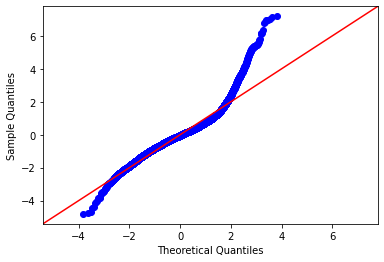

In [1212]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

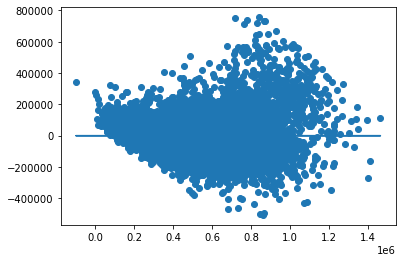

In [1213]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [1214]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([ 99559.56627371, 111038.6101479 , 104719.79289456, 104153.00344082,
       108634.86247552, 102822.23454633, 102742.25686627, 110336.49109952,
       110261.74962195, 107139.5714763 ])

106140.81388428787

3709.9688912769225

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [1215]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_1,view_1,condition_5,grade_11,grade_4,grade_9,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
18917,0.807922,0.535533,1.155431,2.312526,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21246,-1.540474,2.126570,-0.236816,-2.707785,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8279,0.807922,-1.055505,0.046304,0.353721,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7385,0.807922,0.535533,0.327044,1.242780,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4970,1.982121,2.126570,1.508052,-0.477636,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [1216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Columns: 207 entries, price to basement_1
dtypes: float64(6), uint8(201)
memory usage: 5.4 MB


In [1217]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1218]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 

In [1219]:
model_2_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'renovated_1',
 'basement_1']]

In [1220]:
model_2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [1221]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [1222]:
#train, test = train_test_split(model_2_df)

In [1223]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
18917,465000.0,0.807922,0.535533,1.155431,2.312526,0.986319,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21246,559000.0,-1.540474,2.126570,-0.236816,-2.707785,2.848349,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8279,480000.0,0.807922,-1.055505,0.046304,0.353721,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7385,584999.0,0.807922,0.535533,0.327044,1.242780,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4970,815000.0,1.982121,2.126570,1.508052,-0.477636,0.986319,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1224]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
19383,625000.0,-0.366276,-1.055505,0.522266,1.111024,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9548,400000.0,-1.540474,-1.055505,-1.990573,-0.346380,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5325,285000.0,-0.366276,-1.055505,-0.519268,-0.000529,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6119,650000.0,-0.366276,0.535533,0.046304,-1.134593,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129,430000.0,0.807922,0.535533,0.352265,-0.678318,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1225]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     758.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:54   Log-Likelihood:            -1.9563e+05
No. Observations:               14570   AIC:                         3.913e+05
Df Residuals:                   14548   BIC:                         3.915e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.539e+05   4.12e+04     20.719      0.000    7.73e+05    9.35e+05
bedrooms     -5689.3894   1814.664     -3.135      0.002   -9246.361   -2132.417
bathrooms    -4560.2870   1905.758     -2.393      0.017   -8295.815    -824.759
sqft_living   7.256e+04   2751.973     26.368      0.000    6.72e+04     7.8e+04
sqft_lot     -2.722e+04   1792.679    -15.183      0.000   -3.07e+04   -2.37e+04
floors       -4085.6809   2090.756     -1.954      0.051   -8183.829      12.467
waterfront_1  1.971e+05   2.39e+04      8.254      0.000     1.5e+05    2.44e+05
view_1        1.267e+05   5239.102     24.177      0.000    1.16e+05    1.37e+05
condition_2  -9.543e+04   4.32e+04     -2.207      0.027    -1.8e+05   -1.07e+04
condition_3  -9.393e+04   4.04e+04     -2.323      0.020   -1.73e+05   -1.47e+04
condition_4  -3.938e+04   4.04e+04     -0.974      0.330   -1.19e+05    3.99e+04
condition_5    1.57e+04   4.07e+04      0.386      0.699    -6.4e+04    9.54e+04
grade_11      1.538e+05   2.35e+04      6.545      0.000    1.08e+05       2e+05
grade_3      -3.817e+05   1.65e+05     -2.318      0.020   -7.05e+05   -5.89e+04
grade_4      -3.938e+05   3.77e+04    -10.442      0.000   -4.68e+05    -3.2e+05
grade_5       -4.52e+05    1.6e+04    -28.188      0.000   -4.83e+05   -4.21e+05
grade_6      -4.299e+05   1.02e+04    -42.171      0.000    -4.5e+05    -4.1e+05
grade_7       -3.95e+05   8562.060    -46.132      0.000   -4.12e+05   -3.78e+05
grade_8      -3.038e+05   8055.303    -37.714      0.000    -3.2e+05   -2.88e+05
grade_9      -1.349e+05   8368.530    -16.119      0.000   -1.51e+05   -1.18e+05
renovated_1   1.211e+05   7789.735     15.551      0.000    1.06e+05    1.36e+05
basement_1    4.019e+04   3451.454     11.643      0.000    3.34e+04     4.7e+04
==============================================================================
Omnibus:                     2479.374   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6287.450
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                       5.605   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Perform stepwise selection

In [1226]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19427 non-null  float64
 1   bedrooms      19427 non-null  float64
 2   bathrooms     19427 non-null  float64
 3   sqft_living   19427 non-null  float64
 4   sqft_lot      19427 non-null  float64
 5   floors        19427 non-null  float64
 6   waterfront_1  19427 non-null  uint8  
 7   view_1        19427 non-null  uint8  
 8   condition_2   19427 non-null  uint8  
 9   condition_3   19427 non-null  uint8  
 10  condition_4   19427 non-null  uint8  
 11  condition_5   19427 non-null  uint8  
 12  grade_11      19427 non-null  uint8  
 13  grade_3       19427 non-null  uint8  
 14  grade_4       19427 non-null  uint8  
 15  grade_5       19427 non-null  uint8  
 16  grade_6       19427 non-null  uint8  
 17  grade_7       19427 non-null  uint8  
 18  grade_8       19427 non-nu

In [1227]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
'''

'\ndef stepwise_selection(X, y, \n                       initial_list=[], \n                       threshold_in=0.01, \n                       threshold_out = 0.05, \n                       verbose=True):\n    """ Perform a forward`-backward feature selection \n    based on p-value from statsmodels.api.OLS\n    Arguments:\n        X - pandas.DataFrame with candidate features\n        y - list-like with the target\n        initial_list - list of features to start with (column names of X)\n        threshold_in - include a feature if its p-value < threshold_in\n        threshold_out - exclude a feature if its p-value > threshold_out\n        verbose - whether to print the sequence of inclusions and exclusions\n    Returns: list of selected features \n    Always set threshold_in < threshold_out to avoid infinite looping.\n    See https://en.wikipedia.org/wiki/Stepwise_regression for the details\n    """\n    included = list(initial_list)\n    while True:\n        changed=False\n        # f

In [1228]:
'''
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)
'''

"\nX = model_2_df.drop('price', axis=1)\ny = model_2_df['price']\n\nresult = stepwise_selection(X, y, verbose = True)\nprint('resulting features:')\nprint(result)\n"

In [1229]:
'''
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()
'''

'\nX_fin = X[result]\nX_with_intercept = sm.add_constant(X_fin)\nmodel = sm.OLS(y,X_with_intercept).fit()\nmodel.summary()\n'

Note much of a difference in Adj. R-squared.

21 features, underfitting due to low Adj. R-squared.

# Model 3: Remove yr_built 

In [1230]:
model_3_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199',
 'renovated_1',
 'basement_1']]

In [1231]:
model_3_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1232]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [1233]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
18917,465000.0,0.807922,0.535533,1.155431,2.312526,0.986319,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21246,559000.0,-1.540474,2.126570,-0.236816,-2.707785,2.848349,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8279,480000.0,0.807922,-1.055505,0.046304,0.353721,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7385,584999.0,0.807922,0.535533,0.327044,1.242780,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4970,815000.0,1.982121,2.126570,1.508052,-0.477636,0.986319,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1234]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
19383,625000.0,-0.366276,-1.055505,0.522266,1.111024,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9548,400000.0,-1.540474,-1.055505,-1.990573,-0.346380,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5325,285000.0,-0.366276,-1.055505,-0.519268,-0.000529,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6119,650000.0,-0.366276,0.535533,0.046304,-1.134593,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129,430000.0,0.807922,0.535533,0.352265,-0.678318,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1235]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     757.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:54   Log-Likelihood:            -1.8833e+05
No. Observations:               14570   AIC:                         3.768e+05
Df Residuals:                   14479   BIC:                         3.775e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.275e+05    2.6e+04     16.423      0.000    3.76e+05    4.79e+05
bedrooms      -3377.2476   1119.353     -3.017      0.003   -5571.323   -1183.172
bathrooms      1.061e+04   1170.393      9.065      0.000    8315.011    1.29e+04
sqft_living     8.22e+04   1711.632     48.024      0.000    7.88e+04    8.56e+04
sqft_lot       2.157e+04   1261.438     17.103      0.000    1.91e+04     2.4e+04
floors        -4221.3717   1305.523     -3.233      0.001   -6780.363   -1662.380
waterfront_1     2.9e+05   1.49e+04     19.426      0.000    2.61e+05    3.19e+05
view_1         1.108e+05   3308.186     33.499      0.000    1.04e+05    1.17e+05
condition_2    2.825e+04   2.63e+04      1.073      0.283   -2.34e+04    7.99e+04
condition_3    4.881e+04   2.46e+04      1.981      0.048     508.015    9.71e+04
condition_4    6.986e+04   2.46e+04      2.835      0.005    2.15e+04    1.18e+05
condition_5    1.074e+05   2.48e+04      4.336      0.000    5.89e+04    1.56e+05
grade_11       1.117e+05   1.43e+04      7.789      0.000    8.36e+04     1.4e+05
grade_3        -608.3013      1e+05     -0.006      0.995   -1.97e+05    1.96e+05
grade_4       -1.661e+05   2.31e+04     -7.190      0.000   -2.11e+05   -1.21e+05
grade_5        -2.31e+05      1e+04    -23.042      0.000   -2.51e+05   -2.11e+05
grade_6       -2.421e+05   6497.858    -37.251      0.000   -2.55e+05   -2.29e+05
grade_7         -2.4e+05   5442.163    -44.109      0.000   -2.51e+05   -2.29e+05
grade_8        -1.96e+05   5035.523    -38.917      0.000   -2.06e+05   -1.86e+05
grade_9       -8.824e+04   5140.998    -17.164      0.000   -9.83e+04   -7.82e+04
zipcode_98002   1.71e+04   1.03e+04      1.653      0.098   -3172.961    3.74e+04
zipcode_98003  8943.2000   9483.341      0.943      0.346   -9645.360    2.75e+04
zipcode_98004  6.282e+05   1.02e+04     61.485      0.000    6.08e+05    6.48e+05
zipcode_98005   3.49e+05    1.1e+04     31.701      0.000    3.27e+05    3.71e+05
zipcode_98006   2.86e+05   8692.518     32.896      0.000    2.69e+05    3.03e+05
zipcode_98007  2.598e+05   1.21e+04     21.517      0.000    2.36e+05    2.83e+05
zipcode_98008  2.648e+05   9565.425     27.680      0.000    2.46e+05    2.84e+05
zipcode_98010  7.547e+04   1.53e+04      4.921      0.000    4.54e+04    1.06e+05
zipcode_98011  1.626e+05   1.07e+04     15.262      0.000    1.42e+05    1.83e+05
zipcode_98014  1.125e+05   1.45e+04      7.782      0.000    8.41e+04    1.41e+05
zipcode_98019   1.08e+05   1.12e+04      9.647      0.000     8.6e+04     1.3e+05
zipcode_98022 -8602.3489   1.07e+04     -0.804      0.422   -2.96e+04    1.24e+04
zipcode_98023 -1.433e+04   8276.603     -1.731      0.083   -3.06e+04    1892.345
zipcode_98024  1.322e+05   2.09e+04      6.310      0.000    9.11e+04    1.73e+05
zipcode_98027  2.127e+05   9055.075     23.489   

## Remove Uninfluential features part 2

In [1236]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

91 80
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.275e+05,2.6e+04,16.423,0.000,3.76e+05,4.79e+05
bedrooms,-3377.2476,1119.353,-3.017,0.003,-5571.323,-1183.172
bathrooms,1.061e+04,1170.393,9.065,0.000,8315.011,1.29e+04
sqft_living,8.22e+04,1711.632,48.024,0.000,7.88e+04,8.56e+04
sqft_lot,2.157e+04,1261.438,17.103,0.000,1.91e+04,2.4e+04


In [1237]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     850.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:00:54   Log-Likelihood:            -1.8834e+05
No. Observations:               14570   AIC:                         3.768e+05
Df Residuals:                   14489   BIC:                         3.775e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.522e+05   1.07e+04     42.147      0.000    4.31e+05    4.73e+05
bedrooms      -3308.9358   1119.248     -2.956      0.003   -5502.805   -1115.067
bathrooms      1.069e+04   1170.398      9.131      0.000    8392.628     1.3e+04
sqft_living    8.218e+04   1709.922     48.059      0.000    7.88e+04    8.55e+04
sqft_lot       2.138e+04   1257.408     17.007      0.000    1.89e+04    2.38e+04
floors        -4169.8943   1303.846     -3.198      0.001   -6725.600   -1614.189
waterfront_1   2.893e+05   1.49e+04     19.379      0.000     2.6e+05    3.19e+05
view_1         1.108e+05   3304.142     33.545      0.000    1.04e+05    1.17e+05
condition_3    2.511e+04   9220.715      2.723      0.006    7038.398    4.32e+04
condition_4    4.627e+04   9265.687      4.994      0.000    2.81e+04    6.44e+04
condition_5    8.412e+04   9589.527      8.772      0.000    6.53e+04    1.03e+05
grade_11       1.121e+05   1.44e+04      7.809      0.000     8.4e+04     1.4e+05
grade_4       -1.654e+05   2.31e+04     -7.161      0.000   -2.11e+05    -1.2e+05
grade_5       -2.305e+05   9943.250    -23.177      0.000    -2.5e+05   -2.11e+05
grade_6       -2.415e+05   6474.952    -37.294      0.000   -2.54e+05   -2.29e+05
grade_7       -2.394e+05   5427.564    -44.106      0.000    -2.5e+05   -2.29e+05
grade_8       -1.961e+05   5029.350    -38.990      0.000   -2.06e+05   -1.86e+05
grade_9       -8.844e+04   5136.909    -17.216      0.000   -9.85e+04   -7.84e+04
zipcode_98004  6.271e+05   8372.723     74.893      0.000    6.11e+05    6.43e+05
zipcode_98005  3.482e+05   9321.277     37.356      0.000     3.3e+05    3.66e+05
zipcode_98006   2.85e+05   6406.893     44.490      0.000    2.72e+05    2.98e+05
zipcode_98007  2.586e+05   1.06e+04     24.483      0.000    2.38e+05    2.79e+05
zipcode_98008  2.636e+05   7555.036     34.889      0.000    2.49e+05    2.78e+05
zipcode_98010  7.423e+04   1.42e+04      5.224      0.000    4.64e+04    1.02e+05
zipcode_98011  1.614e+05   8928.152     18.082      0.000    1.44e+05    1.79e+05
zipcode_98014  1.114e+05   1.33e+04      8.404      0.000    8.54e+04    1.37e+05
zipcode_98019  1.068e+05   9579.073     11.148      0.000     8.8e+04    1.26e+05
zipcode_98024  1.311e+05   2.01e+04      6.510      0.000    9.16e+04    1.71e+05
zipcode_98027  2.116e+05   6920.723     30.580      0.000    1.98e+05    2.25e+05
zipcode_98028  1.399e+05   7488.702     18.685      0.000    1.25e+05    1.55e+05
zipcode_98029  2.351e+05   7311.657     32.154      0.000    2.21e+05    2.49e+05
zipcode_98031  2.451e+04   7574.912      3.235      0.001    9657.707    3.94e+04
zipcode_98033  3.436e+05   6439.396     53.364      0.000    3.31e+05    3.56e+05
zipcode_98034  2.001e+05   5574.260     35.902      0.000    1.89e+05    2.11e+05
zipcode_98038  4.695e+04   5841.146      8.037   

## Evaluate Model using sci-kit learn's cross_val_score

In [1238]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([ 92976.96070937, 104375.04800124,  97216.77763174,  99510.72636383,
       103385.20454673,  97999.8636892 ,  98308.39096878, 102374.53152879,
       102782.19339745, 102341.06811895])

100127.07649560641

3368.5256893027154

# Check the Normality Assumption

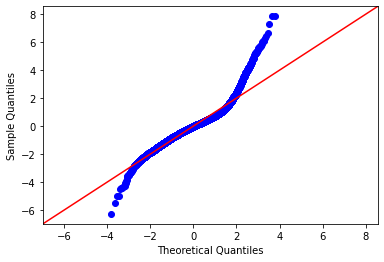

In [1239]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

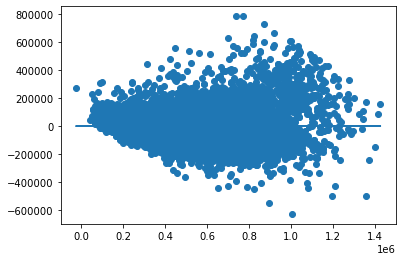

In [1240]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [1241]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.8346641868380222),
 ('bathrooms', 1.9882805922133486),
 ('sqft_living', 4.228496195414826),
 ('sqft_lot', 2.279743591386287),
 ('floors', 2.46163031363075),
 ('waterfront_1', 1.0982049742034627),
 ('view_1', 1.3090610780291336),
 ('condition_3', 21.118139975840936),
 ('condition_4', 9.78710897223863),
 ('condition_5', 3.739807118741106),
 ('grade_11', 1.104520114976364),
 ('grade_4', 1.0780589164847725),
 ('grade_5', 1.4887073439782597),
 ('grade_6', 4.930959149003257),
 ('grade_7', 14.854539663903662),
 ('grade_8', 8.688501911525993),
 ('grade_9', 3.7306551724726216),
 ('zipcode_98004', 1.0853790495445652),
 ('zipcode_98005', 1.0689504292311909),
 ('zipcode_98006', 1.175143176278758),
 ('zipcode_98007', 1.0525433692655544),
 ('zipcode_98008', 1.1113928931474923),
 ('zipcode_98010', 1.037601521559944),
 ('zipcode_98011', 1.0724760480178028),
 ('zipcode_98014', 1.043040299050128),
 ('zipcode_98019', 1.0690054493110595),
 ('zipcode_98024', 1.021776392074404),
 ('zipcode_9

## Perform Another Round of Feature Selection

In [1242]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

80 76


In [1243]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     763.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:01:00   Log-Likelihood:            -1.8929e+05
No. Observations:               14570   AIC:                         3.787e+05
Df Residuals:                   14493   BIC:                         3.793e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.689e+05   2577.414    104.326      0.000    2.64e+05    2.74e+05
bedrooms      -1.065e+04   1177.304     -9.049      0.000    -1.3e+04   -8345.490
bathrooms      1.496e+04   1236.449     12.096      0.000    1.25e+04    1.74e+04
sqft_living     1.05e+05   1718.439     61.129      0.000    1.02e+05    1.08e+05
sqft_lot       2.627e+04   1327.820     19.787      0.000    2.37e+04    2.89e+04
floors         1917.0817   1361.681      1.408      0.159    -751.988    4586.151
waterfront_1   2.872e+05   1.59e+04     18.032      0.000    2.56e+05    3.18e+05
view_1         1.229e+05   3507.084     35.046      0.000    1.16e+05     1.3e+05
condition_5    4.367e+04   3316.575     13.169      0.000    3.72e+04    5.02e+04
grade_11       2.532e+05   1.48e+04     17.106      0.000    2.24e+05    2.82e+05
grade_4        1.028e+05   2.36e+04      4.347      0.000    5.64e+04    1.49e+05
grade_5        2.549e+04   8558.214      2.978      0.003    8714.566    4.23e+04
grade_6        6005.2626   3404.838      1.764      0.078    -668.654    1.27e+04
grade_9        8.365e+04   3128.122     26.742      0.000    7.75e+04    8.98e+04
zipcode_98004  6.493e+05   8913.622     72.840      0.000    6.32e+05    6.67e+05
zipcode_98005  3.698e+05   9912.043     37.305      0.000     3.5e+05    3.89e+05
zipcode_98006  3.193e+05   6771.758     47.148      0.000    3.06e+05    3.33e+05
zipcode_98007  2.828e+05   1.13e+04     25.130      0.000    2.61e+05    3.05e+05
zipcode_98008  2.738e+05   8048.472     34.017      0.000    2.58e+05     2.9e+05
zipcode_98010  7.129e+04   1.52e+04      4.704      0.000    4.16e+04    1.01e+05
zipcode_98011  1.573e+05   9517.225     16.529      0.000    1.39e+05    1.76e+05
zipcode_98014  1.022e+05   1.41e+04      7.231      0.000    7.45e+04     1.3e+05
zipcode_98019  8.955e+04   1.02e+04      8.779      0.000    6.96e+04     1.1e+05
zipcode_98024  1.278e+05   2.15e+04      5.951      0.000    8.57e+04     1.7e+05
zipcode_98027  2.275e+05   7369.601     30.874      0.000    2.13e+05    2.42e+05
zipcode_98028  1.385e+05   7983.127     17.351      0.000    1.23e+05    1.54e+05
zipcode_98029  2.507e+05   7771.514     32.265      0.000    2.36e+05    2.66e+05
zipcode_98031  2.195e+04   8077.515      2.717      0.007    6116.503    3.78e+04
zipcode_98033  3.602e+05   6857.097     52.534      0.000    3.47e+05    3.74e+05
zipcode_98034  2.009e+05   5939.020     33.821      0.000    1.89e+05    2.13e+05
zipcode_98038  3.522e+04   6212.615      5.670      0.000     2.3e+04    4.74e+04
zipcode_98039  7.942e+05   2.96e+04     26.804      0.000    7.36e+05    8.52e+05
zipcode_98040  5.303e+05   8848.677     59.935      0.000    5.13e+05    5.48e+05
zipcode_98045  9.051e+04   9437.621      9.591      0.000     7.2e+04    1.09e+05
zipcode_98052  2.808e+05   5870.140     47.829   

In [1244]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([ 99442.47776925, 111944.428134  , 104932.53632635, 105074.01496789,
       109519.06708667, 103793.62546954, 103668.73121134, 110915.59667719,
       110498.15691626, 108218.18796868])

106800.68225271674

3820.038350825042

In [1245]:
# Save model
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [1246]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
19383,625000.0,-0.366276,-1.055505,0.522266,1.111024,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9548,400000.0,-1.540474,-1.055505,-1.990573,-0.346380,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5325,285000.0,-0.366276,-1.055505,-0.519268,-0.000529,-0.875711,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6119,650000.0,-0.366276,0.535533,0.046304,-1.134593,-0.875711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129,430000.0,0.807922,0.535533,0.352265,-0.678318,0.986319,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1247]:
len(test)

4857

In [1248]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:01:01   Log-Likelihood:                -63184.
No. Observations:                4857   AIC:                         1.265e+05
Df Residuals:                    4780   BIC:                         1.270e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.725e+05   4477.339     60.867      0.000    2.64e+05    2.81e+05
bedrooms      -1.137e+04   2119.689     -5.365      0.000   -1.55e+04   -7216.321
bathrooms      1.795e+04   2173.608      8.258      0.000    1.37e+04    2.22e+04
sqft_living    1.059e+05   3004.414     35.263      0.000       1e+05    1.12e+05
sqft_lot       2.929e+04   2379.094     12.313      0.000    2.46e+04     3.4e+04
floors         1288.5395   2399.018      0.537      0.591   -3414.641    5991.720
waterfront_1   5.331e+05   3.11e+04     17.121      0.000    4.72e+05    5.94e+05
view_1         1.026e+05   6561.029     15.638      0.000    8.97e+04    1.15e+05
condition_5    4.947e+04   6128.887      8.071      0.000    3.75e+04    6.15e+04
grade_11       2.506e+05   2.38e+04     10.522      0.000    2.04e+05    2.97e+05
grade_4        7.957e+04   4.55e+04      1.750      0.080   -9589.499    1.69e+05
grade_5        3.452e+04   1.62e+04      2.135      0.033    2822.649    6.62e+04
grade_6       -4561.3352   6042.066     -0.755      0.450   -1.64e+04    7283.896
grade_9        7.771e+04   5490.853     14.152      0.000    6.69e+04    8.85e+04
zipcode_98004  6.576e+05   1.48e+04     44.282      0.000    6.28e+05    6.87e+05
zipcode_98005  3.537e+05   2.32e+04     15.218      0.000    3.08e+05    3.99e+05
zipcode_98006  3.132e+05   1.15e+04     27.187      0.000    2.91e+05    3.36e+05
zipcode_98007  3.066e+05    1.8e+04     17.038      0.000    2.71e+05    3.42e+05
zipcode_98008  2.508e+05   1.36e+04     18.371      0.000    2.24e+05    2.78e+05
zipcode_98010  6.379e+04   2.28e+04      2.796      0.005    1.91e+04    1.09e+05
zipcode_98011  1.397e+05   1.59e+04      8.797      0.000    1.09e+05    1.71e+05
zipcode_98014  7.273e+04   2.63e+04      2.762      0.006    2.11e+04    1.24e+05
zipcode_98019  7.721e+04   1.74e+04      4.442      0.000    4.31e+04    1.11e+05
zipcode_98024  1.157e+05   2.86e+04      4.047      0.000    5.96e+04    1.72e+05
zipcode_98027  2.219e+05   1.38e+04     16.055      0.000    1.95e+05    2.49e+05
zipcode_98028  1.491e+05   1.31e+04     11.358      0.000    1.23e+05    1.75e+05
zipcode_98029  2.476e+05   1.31e+04     18.830      0.000    2.22e+05    2.73e+05
zipcode_98031  8043.6890   1.36e+04      0.592      0.554   -1.86e+04    3.47e+04
zipcode_98033  3.819e+05   1.15e+04     33.116      0.000    3.59e+05    4.04e+05
zipcode_98034  2.032e+05   1.06e+04     19.147      0.000    1.82e+05    2.24e+05
zipcode_98038  2.744e+04   9664.200      2.839      0.005    8492.191    4.64e+04
zipcode_98039  9.699e+05   6.31e+04     15.372      0.000    8.46e+05    1.09e+06
zipcode_98040   5.25e+05   1.67e+04     31.379      0.000    4.92e+05    5.58e+05
zipcode_98045  8.746e+04   1.75e+04      5.004      0.000    5.32e+04    1.22e+05
zipcode_98052  2.859e+05   1.03e+04     27.683   

In [1249]:
len(x_cols)

76

In [1250]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([103438.80028462, 116648.47904211, 106554.52500044,  99969.40782717,
       105808.71597311, 108350.83956723, 108144.19485588, 122270.93681261,
       118053.89662992, 114528.83526849])

110376.8631261582

6767.551471275236

# THINK: LIMIT ZIP CODES, WHAT ARE MY TOP ONES?

Note: Location within King County is important with a noticeable disparity amongst zipcodes. The median house price ranges from \$235,000 in 98002 up to \$1,260,000 in 98039.

In [1251]:
dfziptiers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_tier_1,zip_tier_2,zip_tier_3,zip_tier_4,zip_tier_5,zip_tier_6,zip_tier_7,zip_tier_8,zip_tier_9,zip_tier_10
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,3,7,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,3,6,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,5,7,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,3,8,...,0,1,0,0,0,0,0,0,0,0


In [1252]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  int64  
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
 17  zip_tier_1     19427 non-null  int64  
 18  zip_ti

In [1253]:
categorical_feats = ['basement', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built']

# Convert to str
for col in categorical_feats:
    dfziptiers[col] = dfziptiers[col].astype('str')

In [1254]:
dfziptiers.drop(['zip_tier_1', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode', 'yr_built'],axis = 1, inplace = True)

In [1255]:
dfziptiers = pd.get_dummies(dfziptiers, drop_first = True)

In [1256]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19427 non-null  float64
 1   bedrooms      19427 non-null  float64
 2   bathrooms     19427 non-null  float64
 3   sqft_living   19427 non-null  float64
 4   sqft_lot      19427 non-null  float64
 5   floors        19427 non-null  float64
 6   zip_tier_2    19427 non-null  int64  
 7   zip_tier_3    19427 non-null  int64  
 8   zip_tier_4    19427 non-null  int64  
 9   zip_tier_5    19427 non-null  int64  
 10  zip_tier_6    19427 non-null  int64  
 11  zip_tier_7    19427 non-null  int64  
 12  zip_tier_8    19427 non-null  int64  
 13  zip_tier_9    19427 non-null  int64  
 14  zip_tier_10   19427 non-null  int64  
 15  waterfront_1  19427 non-null  uint8  
 16  view_1        19427 non-null  uint8  
 17  condition_2   19427 non-null  uint8  
 18  condition_3   19427 non-nu

In [1257]:
zip_feats = ['zip_tier_2', 'zip_tier_3', 'zip_tier_4', 'zip_tier_5', 'zip_tier_6', 
                     'zip_tier_7', 'zip_tier_8', 'zip_tier_9', 'zip_tier_10',]

# Convert to str
for col in zip_feats:
    dfziptiers[col] = dfziptiers[col].astype('uint8')

In [1258]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19427 non-null  float64
 1   bedrooms      19427 non-null  float64
 2   bathrooms     19427 non-null  float64
 3   sqft_living   19427 non-null  float64
 4   sqft_lot      19427 non-null  float64
 5   floors        19427 non-null  float64
 6   zip_tier_2    19427 non-null  uint8  
 7   zip_tier_3    19427 non-null  uint8  
 8   zip_tier_4    19427 non-null  uint8  
 9   zip_tier_5    19427 non-null  uint8  
 10  zip_tier_6    19427 non-null  uint8  
 11  zip_tier_7    19427 non-null  uint8  
 12  zip_tier_8    19427 non-null  uint8  
 13  zip_tier_9    19427 non-null  uint8  
 14  zip_tier_10   19427 non-null  uint8  
 15  waterfront_1  19427 non-null  uint8  
 16  view_1        19427 non-null  uint8  
 17  condition_2   19427 non-null  uint8  
 18  condition_3   19427 non-nu

In [1259]:
# Defining the problem
outcome = 'price'
x_cols = list(dfziptiers.columns)
x_cols.remove(outcome)

In [1260]:
dfziptiers.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'zip_tier_2', 'zip_tier_3', 'zip_tier_4', 'zip_tier_5', 'zip_tier_6',
       'zip_tier_7', 'zip_tier_8', 'zip_tier_9', 'zip_tier_10', 'waterfront_1',
       'view_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_11', 'grade_12', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'renovated_1', 'basement_1'],
      dtype='object')

In [1261]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [1262]:
dfziptiers.columns = [col_formatting(col) for col in dfziptiers.columns]

In [1263]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'zip_tier_9' is not defined
    price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+zip_tier_2+zip_tier_3+zip_tier_4+zip_tier_5+zip_tier_6+zip_tier_7+zip_tier_8+zip_tier_9+zip_tier_10+waterfront_1+view_1+condition_2+condition_3+condition_4+condition_5+grade_11+grade_12+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+renovated_1+basement_1
                                                                                                                                      ^^^^^^^^^^